In [14]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

In [19]:
OFFSET = np.array([-5, -2, 0])

grid_dots = []
for x in range(-7, 8):
    for y in range(-4, 5):
        grid_dots.append(Dot(np.array([x, y, 0]), color=GRAY_A))
grid = Group(*grid_dots)

num_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            axis_config={"include_numbers": True},
        )

note_labels = {-2 : "A", -1 : "B", 0 : "C", 1  : "D", 2 : "E", 3 : "F", 4 : "G", 5 : "A", 6: "B"}

midi_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT},
        )

midi_ax.get_y_axis().add_labels(note_labels)





NumberLine

In [20]:
%%manim -qm FourPixels

SIZE_SQUARE = 0.9
class FourPixels(Scene) :
  def construct(self) :
    self.camera.background_color = WHITE

    # transition = FullScreenRectangle(fill_opacity = 1)
    # transition.color = WHITE
    # transition.fill_opacity = 1

    self.add(grid)
    num_ax.color = BLACK
    self.add(num_ax)
    # self.add(transition)

    comment = Tex('''A pattern is a partial function

that associates a point of the space to an atom, here a color.

Here, a 4 pixel pattern.''').to_edge(UR)
    comment.height = 1.0
    self.add(comment)

    square1 = Square(
      side_length = SIZE_SQUARE,
      color = RED_C,
      fill_opacity = 0.5)
    square1.move_to(UR/2)


    square2 = square1.copy()
    square2.shift(LEFT)
    square2.color = BLUE_C

    square3 = square2.copy()
    square3.shift(DOWN)
    square3.color = PURPLE_C

    square4 = square3.copy()
    square4.shift(RIGHT)
    square4.color = YELLOW_E

    squares = VGroup(*[square1,square2,square3, square4])
    #self.add(squares)


    label1 = Tex("$(5,2) \mapsto $"," RED")
    label1.height = 0.3
    label1.move_to(UR * 1.3)
    label1[1].color = RED_D

    label2 = Tex("$(4,2) \mapsto $"," BLUE")
    label2.height = 0.3
    label2.move_to(UL * 1.3)
    label2[1].color = BLUE_D

    label3 = Tex("$(4,1) \mapsto $"," PURPLE")
    label3.height = 0.3
    label3.move_to(DL * 1.3)
    label3[1].color = PURPLE_D

    label4 = Tex("$(5,1) \mapsto $"," YELLOW")
    label4.height = 0.3
    label4.move_to(DR * 1.3)
    label4[1].color = YELLOW_E

    labels = VGroup(*[label1,label2,label3, label4])
    #self.add(labels)

    self.play(
      # FadeOut(transition),
      Create(num_ax),
      FadeIn(comment),
      FadeIn(squares),
      FadeIn(labels),
      run_time=2)


    #self.play(,runtime=0.5)
    self.pause(0.5)

Manim Community v0.18.1

In [62]:
%%manim -qm DoReMiNiveau0

midi_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT}
        )

midi_ax.get_y_axis().add_labels(note_labels)


midi_ax2 = Axes(
            x_range=[-6, 36, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={
              "include_numbers": True,
              "longer_tick_multiple" : 4,
              "numbers_to_include" : [ 2 * i for i in range(-6,36)]
            },
            y_axis_config={"label_direction": 1.5*UP + LEFT}
        )

midi_ax2.get_y_axis().add_labels(note_labels)


class DoReMiNiveau0(Scene) :
  def construct(self) :
    self.add(grid)
    self.add(midi_ax)
    comment = Tex('''\emph{Do Ré Mi, La perdrix}, the full track''').to_edge(UR)
    comment.height = 0.3

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    square1 = Square(
      side_length = SIZE_SQUARE,
      color = WHITE,
      fill_opacity = 0.5)
    square1.move_to(UR/2 + OFFSET)

    square2 = square1.copy()
    square2.shift(UR)

    square3 = square2.copy()
    square3.shift(UR)

    doremi= VGroup(*[square1,square2, square3])

    square4 = square3.copy()
    square4.shift(RIGHT * 2)

    square5 = square4.copy()
    square5.shift(RIGHT)

    square6 = square5.copy()
    square6.shift(RIGHT)

    laperdrix= VGroup(*[square4,square5, square6])
    self.add(laperdrix)



    self.add(doremi)
    self.add(laperdrix)
    midi_ax.generate_target()
    midi_ax.target = midi_ax2


    doremi.generate_target()
    doremi.target.stretch_to_fit_width(doremi.width/3)
    doremi.target.shift(LEFT)

    self.play(
      MoveToTarget(doremi) ,
      laperdrix.animate
        .stretch_to_fit_width(width = laperdrix.width / 3)
        .shift(11/3 *LEFT),
      MoveToTarget(midi_ax),
      FadeOut(grid),
      run_time = 2
    )

    mifasol = doremi.copy()
    mifasol.shift(8/3*RIGHT + 2 * UP)
    self.add(mifasol)
    self.play(Create(mifasol))

    self.pause(1/4)

    senvole = laperdrix.copy()
    senvole.shift(8/3*RIGHT + 2 * UP)
    self.add(senvole)
    self.play(Create(senvole))

    self.pause(1/4)

    fa = Square(
      side_length = SIZE_SQUARE,
      color = WHITE,
      fill_opacity = 0.5)
    fa.shift(UR/2)

    mi = fa.copy()
    mi.shift(DR)

    re = mi.copy()
    re.shift(DR)



    famire = VGroup(*[fa,mi,re])
    famire.stretch_to_fit_width(width = famire.width/3)


    famire.shift(UP + 2/3 * LEFT)
    self.add(famire)
    self.play(Create(famire))

    self.pause(1/4)

    dansunpres = senvole.copy()
    dansunpres.shift(8/3*RIGHT + 3*DOWN)
    self.add(dansunpres)
    self.play(Create(dansunpres))

    self.pause(1/4)

    miredo = famire.copy()
    miredo.shift(8/3*RIGHT + DOWN)
    self.add(miredo)
    self.play(Create(miredo))

    self.pause(1/4)

    tombeeau = dansunpres.copy()
    tombeeau.shift(8/3*RIGHT + DOWN)
    self.add(tombeeau)
    self.play(Create(tombeeau))

    self.pause(1/4)

In [63]:
%%manim -qm DoReMiNiveau05

square1 = Square(
  side_length = SIZE_SQUARE,
  color = WHITE,
  fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)
square2 = square1.copy()
square2.shift(UR)
square3 = square2.copy()
square3.shift(UR)
square4 = square3.copy()
square4.shift(RIGHT * 2)
square5 = square4.copy()
square5.shift(RIGHT)
square6 = square5.copy()
square6.shift(RIGHT)

doremi_notes = VGroup(*[square1,square2, square3])
doremi_notes.stretch_to_fit_width(width = doremi_notes.width/3)
bg_laperdrix = BackgroundRectangle(
  doremi_notes,
  color=RED_B,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

doremi = VGroup(*[doremi_notes,bg_laperdrix])
doremi.shift(LEFT)

laperdrix_notes = VGroup(*[square4,square5, square6])
laperdrix_notes.stretch_to_fit_width(width = laperdrix_notes.width/3)

bg_laperdrix = BackgroundRectangle(
  laperdrix_notes,
  color=YELLOW_C,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

laperdrix = VGroup(*[laperdrix_notes,bg_laperdrix])
laperdrix.shift(11/3*LEFT)

mifasol = doremi.copy()
mifasol.shift(8/3*RIGHT + 2 * UP)

senvole = laperdrix.copy()
senvole.shift(8/3*RIGHT + 2 * UP)

fa = Square(
  side_length = SIZE_SQUARE,
  color = WHITE,
  fill_opacity = 0.5)
fa.shift(UR/2)

mi = fa.copy()
mi.shift(DR)

re = mi.copy()
re.shift(DR)

famire_notes = VGroup(*[fa,mi,re])
famire_notes.stretch_to_fit_width(width = famire_notes.width/3)


bg_famire = BackgroundRectangle(
  famire_notes,
  color= BLUE_C,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

famire = VGroup(*[famire_notes, bg_famire])
famire.shift(UP + 2/3 * LEFT)
famire[1].color = BLUE_C

dansunpres = senvole.copy()
dansunpres.shift(8/3*RIGHT + 3*DOWN)


miredo = famire.copy()
miredo.shift(8/3*RIGHT + DOWN)

tombeeau = dansunpres.copy()
tombeeau.shift(8/3*RIGHT + DOWN)

patterns = VGroup(*[doremi[1],laperdrix[1],mifasol[1],senvole[1],famire[1],dansunpres[1],miredo[1],tombeeau[1]])

untrans_full = VGroup(*[doremi,laperdrix,mifasol,senvole,famire,dansunpres,miredo,tombeeau])



class DoReMiNiveau05(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''\emph{Do Ré Mi, La perdrix}, the full track''').to_edge(UR)
    comment.height = 0.3

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    #self.add(func_niveau2)
    self.add(untrans_full)
    self.play(FadeIn(patterns))



In [64]:
%%manim -qm DoReMiNiveau1

square1 = Square(
side_length = SIZE_SQUARE,
color = WHITE,
fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)
square2 = square1.copy()
square2.shift(UR)
square3 = square2.copy()
square3.shift(UR)
square4 = square3.copy()
square4.shift(RIGHT * 2)
square5 = square4.copy()
square5.shift(RIGHT)
square6 = square5.copy()
square6.shift(RIGHT)

doremi_notes = VGroup(*[square1,square2, square3])
doremi_notes.stretch_to_fit_width(width = doremi_notes.width/3)
bg_laperdrix = BackgroundRectangle(
doremi_notes,
color=RED_B,
fill_opacity = 0.,
stroke_width = 3,
stroke_opacity = 1.)

doremi = VGroup(*[doremi_notes,bg_laperdrix])
doremi.shift(LEFT)

laperdrix_notes = VGroup(*[square4,square5, square6])
laperdrix_notes.stretch_to_fit_width(width = laperdrix_notes.width/3)

bg_laperdrix = BackgroundRectangle(
laperdrix_notes,
color=YELLOW_C,
fill_opacity = 0.,
stroke_width = 3,
stroke_opacity = 1.)

laperdrix = VGroup(*[laperdrix_notes,bg_laperdrix])
laperdrix.shift(11/3*LEFT)

mifasol = doremi.copy()
mifasol.shift(8/3*RIGHT + 2 * UP)

senvole = laperdrix.copy()
senvole.shift(8/3*RIGHT + 2 * UP)

fa = Square(
side_length = SIZE_SQUARE,
color = WHITE,
fill_opacity = 0.5)
fa.shift(UR/2)

mi = fa.copy()
mi.shift(DR)

re = mi.copy()
re.shift(DR)

famire_notes = VGroup(*[fa,mi,re])
famire_notes.stretch_to_fit_width(width = famire_notes.width/3)


bg_famire = BackgroundRectangle(
famire_notes,
color= BLUE_C,
fill_opacity = 0.,
stroke_width = 3,
stroke_opacity = 1.)

famire = VGroup(*[famire_notes, bg_famire])
famire.shift(UP + 2/3 * LEFT)
famire[1].color = BLUE_C

dansunpres = senvole.copy()
dansunpres.shift(8/3*RIGHT + 3*DOWN)


miredo = famire.copy()
miredo.shift(8/3*RIGHT + DOWN)

tombeeau = dansunpres.copy()
tombeeau.shift(8/3*RIGHT + DOWN)

full_doremi = VGroup(*[doremi,laperdrix,mifasol,senvole,famire,dansunpres,miredo,tombeeau])



func_niveau1 = Tex(
      "$(0,C) \mapsto$", " DoReMi",'''

''',"$(4,E) \mapsto$", " DoDoDo",'''

''',"$(8,E) \mapsto$", " DoReMi",'''

''',"$(12,G) \mapsto$", " DoDoDo",'''

''',"$(16,F) \mapsto$", " DoSiLa",'''

''',"$(20,D) \mapsto$", " DoDoDo",'''

''',"$(24,E) \mapsto$", " DoSiLa",'''

''',"$(28,C) \mapsto$", " DoDoDo",
  )
func_niveau1[1].color = func_niveau1[7].color = RED_C
func_niveau1[13].color = func_niveau1[19].color = BLUE_C
func_niveau1[4].color = func_niveau1[10].color = \
func_niveau1[16].color = func_niveau1[22].color = YELLOW_C

func_niveau1.move_to(RIGHT * 5.5 + UP)
func_niveau1.width = 1.9

class DoReMiNiveau1(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Leveling up in pattern's hierarchy

    Level 1''').to_edge(UR)
    comment.height = 0.8

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    """  func_txt = MathTex(
        "(0,C) \mapsto \text{DoReMi} \\ \
        (4,E) & \mapsto \text{DoDoDo} \\ \
        (8,E) & \mapsto \text{DoReMi} \\ \
        (12,G) & \mapsto \text{DoDoDo} \\ \
        (16,F) & \mapsto \text{DoSiLa} \\ \
        (20,D) & \mapsto \text{DoDoDo} \\ \
        (24,E) & \mapsto \text{DoSiLa} \\ \
        (28,C) & \mapsto \text{DoDoDo} \\ \
      ")
    """

    #self.add(func_niveau2)

    background_doremi= BackgroundRectangle(doremi, fill_opacity = 1.0)
    self.add(background_doremi)
    self.add(doremi)

    full_doremi.generate_target()
    for i in range(len(full_doremi)) :
      full_doremi.target[i][1].set_fill(opacity = 1.0)

    self.play(
      MoveToTarget(full_doremi),
      FadeIn(func_niveau1),
      run_time = 2.0
    )





In [65]:
%%manim -qm DoReMiNiveau2

motif1 = VGroup(*[full_doremi[i] for i in range(2)])
bg_motif1 = BackgroundRectangle(
  motif1,
  color=RED_B,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
  )
motif2 = VGroup(*[full_doremi[i] for i in range(2,4)])

bg_motif2 = BackgroundRectangle(
  motif2,
  color=RED_B,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
)

motif3 = VGroup(*[full_doremi[i] for i in range(4,6)])
bg_motif3 = BackgroundRectangle(
  motif3,
  color=BLUE_C,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
  )

motif4 = VGroup(*[full_doremi[i] for i in range(6,8)])
bg_motif4 = BackgroundRectangle(
  motif4,
  color=BLUE_C,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.
)

bg_motifs = VGroup(*[bg_motif1,bg_motif2,bg_motif3,bg_motif4])


func_niveau2 = Tex(
        "$(0,C) \mapsto$", " Up",'''

''',"$(8,E) \mapsto$", " Up",'''

''',"$(16,F) \mapsto$", " Down",'''

''',"$(24,E) \mapsto$", " Down",
    )

func_niveau2[1].color = func_niveau2[4].color = RED_C
func_niveau2[7].color = func_niveau2[10].color = BLUE_C

func_niveau2.move_to(RIGHT * 5.5 + 2*UP)
func_niveau2.width = 1.9

class DoReMiNiveau2(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Level up !

    Level 2''').to_edge(UR)
    comment.height = 0.7

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    self.add(full_doremi)
    self.add(func_niveau1)


    self.play(
      FadeIn(bg_motifs),
      FadeOut(func_niveau1),
      run_time = 1.5,
    )

    bg_motifs.generate_target()
    for i in range(len(bg_motifs)) :
      bg_motifs.target[i].set_fill(opacity=1.0)

    self.play(
      MoveToTarget(bg_motifs),
      FadeIn(func_niveau2),
      run_time = 1.5)

In [66]:
%%manim -qm DoReMiNiveau3


func_niveau3 = Tex(
        "$(0,C) \mapsto$", " Up",'''

''',"$(16,C) \mapsto$", " Down",
    )

func_niveau3[1].color = RED_C
func_niveau3[4].color = BLUE_C

func_niveau3.move_to(RIGHT * 5.5 + 3*DOWN)
func_niveau3.width = 1.9

class DoReMiNiveau3(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Level Up !

    Level 3''').to_edge(UR)
    comment.height = 0.7

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    self.add(bg_motifs)

    part1 = VGroup(*[full_doremi[i] for i in range(4)])
    bg_part1 = BackgroundRectangle(
      part1,
      color=RED_B,
      fill_opacity = 0.,
      stroke_width = 3,
      stroke_opacity = 1.
      )
    part2 = VGroup(*[full_doremi[i] for i in range(4,8)])

    bg_part2 = BackgroundRectangle(
      part2,
      color=BLUE_C,
      fill_opacity = 0.,
      stroke_width = 3,
      stroke_opacity = 1.
    )

    self.add(func_niveau2)
    self.play(
      FadeIn(bg_part1),
      FadeIn(bg_part2),
      FadeOut(func_niveau2)
    )

    self.play(
      bg_part1.animate.set_fill(opacity = 1.0),
      bg_part2.animate.set_fill(opacity = 1.0),
      FadeIn(func_niveau3),
      run_time = 1.5)

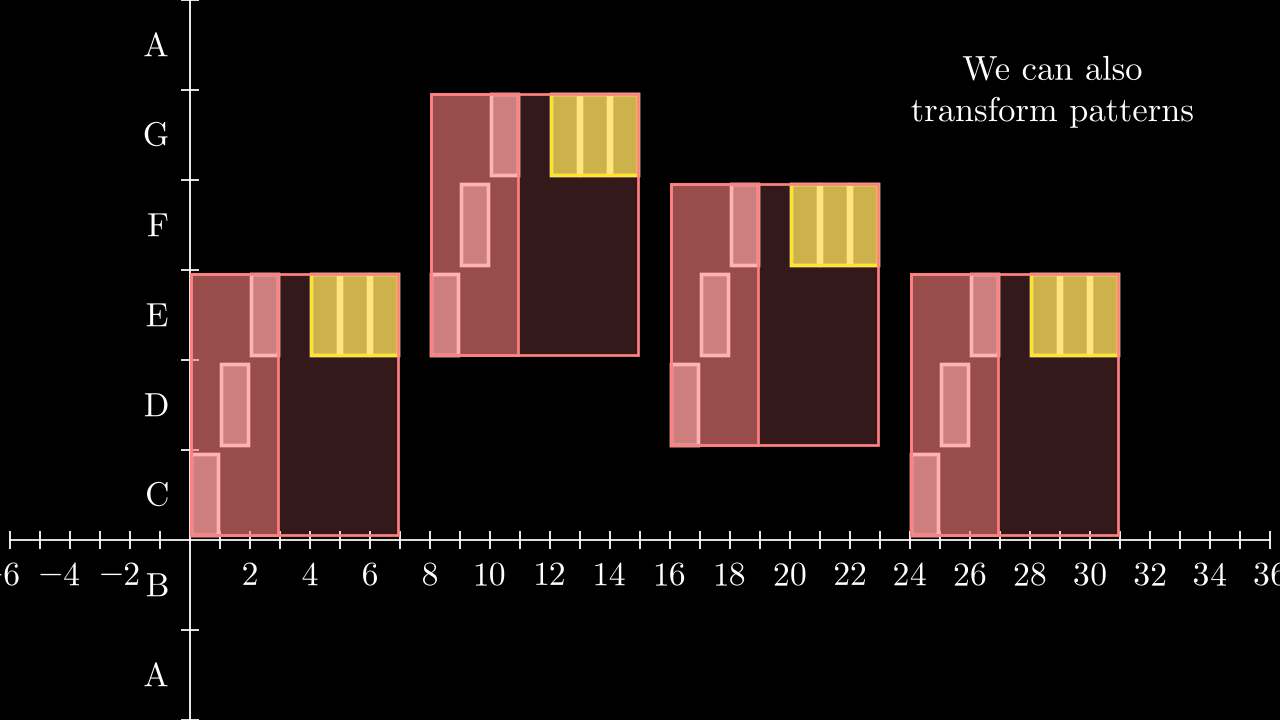

In [67]:
%%manim -qm Inversion1

untrans_full = full_doremi.copy()
for i in range(len(untrans_full)) :
  untrans_full[i][1].set_fill(opacity = 0.5)

untrans_full[4][0] = untrans_full[0][0].copy().shift(5*RIGHT + RIGHT/3 + UP)
untrans_full[4][1].color = RED_B
untrans_full[5].shift(2*UP)
untrans_full[6][0] = untrans_full[0][0].copy().shift(8*RIGHT )
untrans_full[6][1].color = RED_B
untrans_full[7].shift(2*UP)



for motif in bg_motifs :
  motif.set_fill(opacity = 0.2)

untrans_bgs = bg_motifs.copy()

untrans_bgs[2].color = RED_B
untrans_bgs[3].color = RED_B





class Inversion1(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''We can also

transform patterns''').to_edge(UR)
    comment.height = 0.8

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    self.add(untrans_full)
    self.add(untrans_bgs)



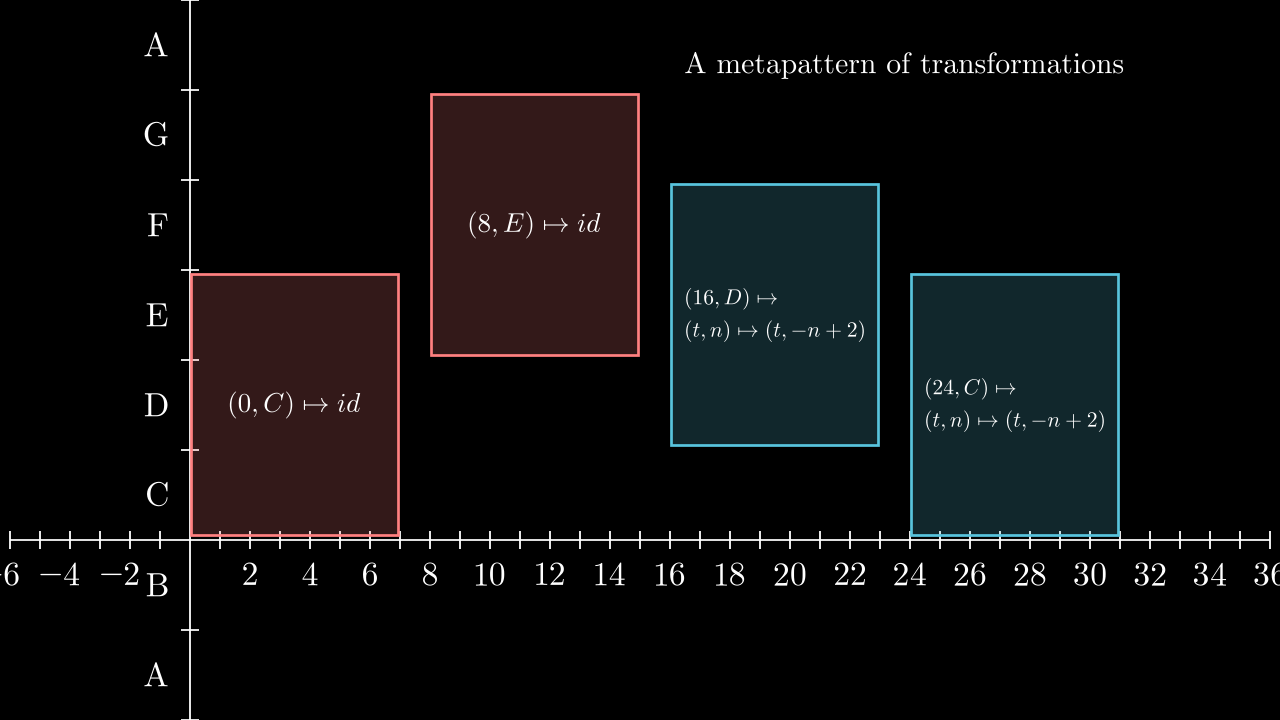

In [68]:
%%manim -qm Inversion2



class Inversion2(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''A metapattern of transformations
  ''').to_edge(UR)
    comment.height = 0.3

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    self.add(bg_motifs)



    transfos = MathTex(
      "(0,C) \mapsto id",
      "(8,E) \mapsto id",
      r"&(16,D) \mapsto \\& (t,n) \mapsto (t, -n + 2)",
      )

    for i in range(len(transfos)) :
      transfos[i].move_to(bg_motifs[i].get_center())
      transfos[i].height = 0.3

    last = MathTex(r"&(24,C) \mapsto \\& (t,n) \mapsto (t, -n + 2)")
    last.height = 0.6
    last.move_to(bg_motifs[3].get_center())
    transfos[2].height = 0.6


    self.add(transfos)
    self.add(last)
    bg_motifs.generate_target()

In [69]:
%%manim -qm Inversion3



class Inversion3(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Apply inversions''').to_edge(UR)
    comment.height = 0.4

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    self.add(untrans_full)
    self.add(untrans_bgs)





    untrans_full.generate_target()
    untrans_full.target = full_doremi
    for i in range(len(untrans_full)) :
      untrans_full.target[i][1].set_fill(opacity = 0.5)
    untrans_bgs.generate_target()
    untrans_bgs.target = bg_motifs

    self.pause(0.5)
    self.play(MoveToTarget(untrans_full), MoveToTarget(untrans_bgs),run_time = 3)



In [70]:
%%manim -qm Translation
midi_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT}
        )

midi_ax.get_y_axis().add_labels(note_labels)


square1 = Square(
  side_length = SIZE_SQUARE,
  color = WHITE,
  fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)
square2 = square1.copy()
square2.shift(UR)
square3 = square2.copy()
square3.shift(UR)
square4 = square3.copy()
square4.shift(RIGHT * 2)
square5 = square4.copy()
square5.shift(RIGHT)
square6 = square5.copy()
square6.shift(RIGHT)

doremi= VGroup(*[square1,square2, square3])


TRANSFORM_COLOR = YELLOW_B
CRANK_RADIUS = 0.2



laperdrix = VGroup(*[square4,square5, square6])

doremilap_notes = VGroup(*[doremi,laperdrix])

bg_doremilap = BackgroundRectangle(
  doremilap_notes,
  color=RED_C,
  fill_opacity = 0.1,
  stroke_width = 3,
  stroke_opacity = 1.)

bg_doremilap.stretch_to_fit_width(8)
bg_doremilap.shift(RIGHT/2)

doremilap = VGroup(*[doremilap_notes,bg_doremilap])

doremilap.generate_target()
doremilap.target.shift(UP + RIGHT)


transl = Tex(
          "$(t,n) \mapsto$", "(t+1,n+1)"
      )

transl.move_to(RIGHT * 5.6 )
transl.width = 2.7
transl.color = TRANSFORM_COLOR


def create_crank(start, end, color = TRANSFORM_COLOR, crank_radius = CRANK_RADIUS) :
    crank_dot = Dot(start, color = color)

    crank_len = np.linalg.norm(end - start)
    crank_line = Line(start, start + (end - start) * (crank_len - crank_radius) / crank_len)
    crank_line.color = color

    crank_arc = Arc(arc_center=end , angle=PI*5/4, start_angle= crank_line.get_angle()+ 3*PI/8, radius=crank_radius)
    crank_arc.color = color
    return VGroup(* [crank_dot,crank_line,crank_arc])


class Translation(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Shifting''').to_edge(UR)
    comment.height = 0.4

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    #self.add(func_niveau2)
    self.add(doremilap)

    self.pause(0.5)
    crank = create_crank(OFFSET,OFFSET + UR)



    self.play(MoveToTarget(doremilap), Create(crank), FadeIn(transl), runtime = 1.5)
    self.pause(0.1)



In [71]:
%%manim -qm Symmetry


sym = Tex(
          "$(t,n) \mapsto$", "(t,E - n)"
      )

sym.move_to(RIGHT * 5.6 )
sym.width = 2.7
sym.color = TRANSFORM_COLOR

fa = Square(
      side_length = SIZE_SQUARE,
      color = WHITE,
      fill_opacity = 0.5)
fa.shift(UR/2 + OFFSET + 2*UP)
mi = fa.copy()
mi.shift(DR)
re = mi.copy()
re.shift(DR)

famire = VGroup(*[fa,mi,re])



dansunpres = laperdrix.copy()
dansunpres.shift(3*DOWN + LEFT)

famiredans = VGroup(*[famire,dansunpres])
famiredans.shift(UR)

class Symmetry(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Symmetry''').to_edge(UR)
    comment.height = 0.4

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    #self.add(func_niveau2)
    self.add(doremilap)


    doremilap.target[0] = famiredans

    self.pause(0.1)
    self.play(MoveToTarget(doremilap),FadeIn(sym),runtime = 1.5)
    self.pause(0.1)

    """  matrix = [[-1,0], [0,-1]]
    doremilap.target.apply_matrix(matrix)
    self.play(MoveToTarget(doremilap),runtime = 1.5)
    self.pause(0.1) """



In [72]:
%%manim -qm Contraction


contract= Tex(
          "$(t,n) \mapsto$", "$(1 + \\frac{t}{2}, n)$"
      )

contract.move_to(RIGHT * 5 )
contract.width = 2.7
contract.color = TRANSFORM_COLOR


class Contraction(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Shrinking''').to_edge(UR)
    comment.height = 0.4

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    #self.add(func_niveau2)
    self.add(doremilap)


    doremilap.target.stretch_to_fit_width(width = doremilap.width / 2)
    doremilap.target.shift(2*LEFT)
    self.pause(0.1)
    self.play(MoveToTarget(doremilap),FadeIn(contract),runtime = 1.5)
    self.pause(0.1)


    """  matrix = [[-1,0], [0,-1]]
    doremilap.target.apply_matrix(matrix)
    self.play(MoveToTarget(doremilap),runtime = 1.5)
    self.pause(0.1) """



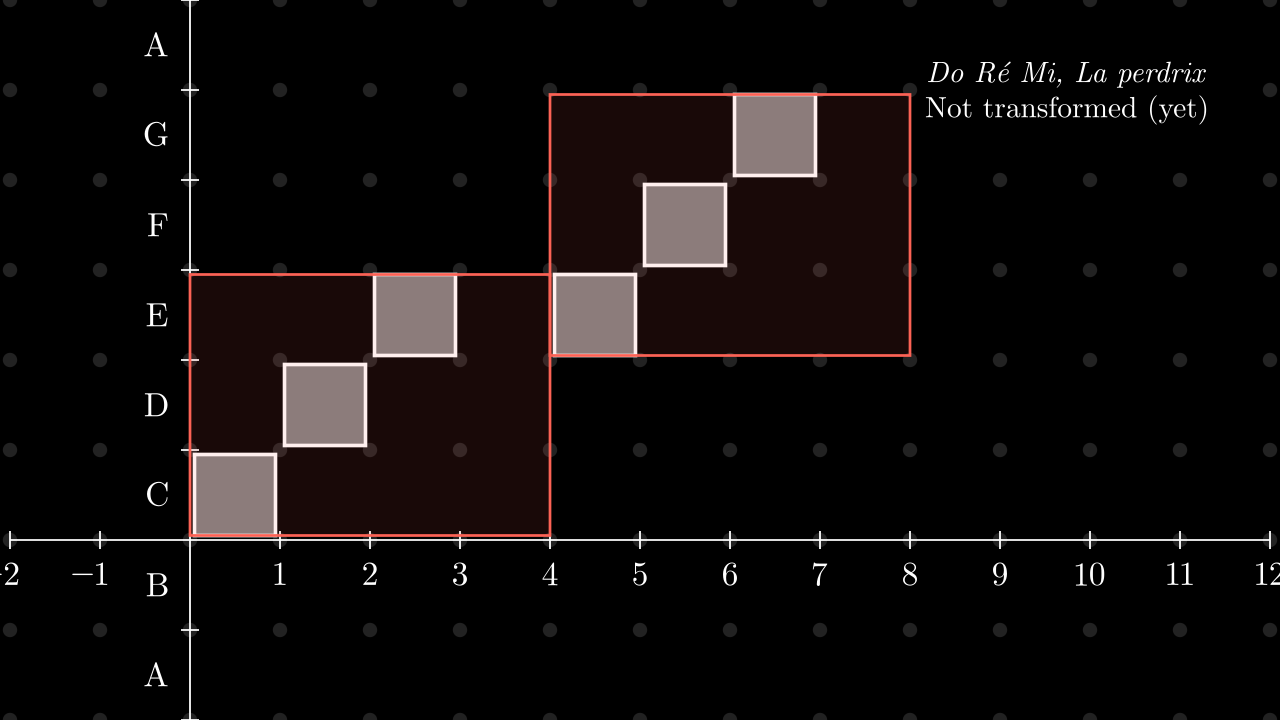

In [73]:
%%manim -qm DoReMiTransfo1

midi_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT}
        )

midi_ax.get_y_axis().add_labels(note_labels)


square1 = Square(
  side_length = SIZE_SQUARE,
  color = WHITE,
  fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)
square2 = square1.copy()
square2.shift(UR)
square3 = square2.copy()
square3.shift(UR)
square4 = square3.copy()
square4.shift(RIGHT * 2)
square5 = square4.copy()
square5.shift(RIGHT)
square6 = square5.copy()
square6.shift(RIGHT)

doremi_notes= VGroup(*[square1,square2, square3])

bg_doremi = BackgroundRectangle(
  doremi_notes,
  color=RED_C,
  fill_opacity = 0.1,
  stroke_width = 3,
  stroke_opacity = 1.)
bg_doremi.stretch_to_fit_width(4)
bg_doremi.shift(RIGHT/2)

doremi = VGroup(*[doremi_notes,bg_doremi])

laperdrix_notes = VGroup(*[square4,square5, square6])

bg_laperdrix = BackgroundRectangle(
  laperdrix_notes,
  color=YELLOW_C,
  fill_opacity = 0.1,
  stroke_width = 3,
  stroke_opacity = 1.)
bg_laperdrix.stretch_to_fit_width(4)
bg_laperdrix.shift(RIGHT/2)

laperdrix = VGroup(*[laperdrix_notes,bg_laperdrix])


class DoReMiTransfo1(Scene) :
  def construct(self) :
    self.add(grid)
    self.add(midi_ax)

    comment = Tex('''\emph{Do Ré Mi, La perdrix}

Not transformed (yet)''').to_edge(UR)
    comment.height = 0.7

    comment.shift(0.5 * RIGHT)

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)




    """ bgs_nontrans = VGroup(*[bgs[0],bgs[0].copy()])

    bgs_nontrans[1].shift(4.05 * RIGHT + 2 * UP ) """

    """ crank = create_crank(
      bgs[0].get_corner(DL), bgs[1].get_corner(DL) + 0.1 * DL)

    big_cranks = VGroup(*[
      crank ,
      crank.copy()
    ])

    big_cranks[1].shift(4 * RIGHT + 2 * UP)
    self.add(big_cranks)"""

    #self.add(bgs_nontrans)
    self.add(doremi)
    self.add(doremi.copy().shift(4*RIGHT + 2 * UP))
    #self.add(doremi)

In [74]:
%%manim -qm DoReMiProjection
class DoReMiProjection(Scene) :
  def construct(self) :
    self.add(grid)
    self.add(midi_ax)

    comment = Tex('''\emph{Do Ré Mi, La perdrix}

Apply a projection''').to_edge(UR)
    comment.height = 0.8

    comment.shift(0.5 * RIGHT)

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
   # self.add(comment)




    """ bgs_nontrans = VGroup(*[bgs[0],bgs[0].copy()])

    bgs_nontrans[1].shift(4.05 * RIGHT + 2 * UP ) """

    """ crank = create_crank(
      bgs[0].get_corner(DL), bgs[1].get_corner(DL) + 0.1 * DL)

    big_cranks = VGroup(*[
      crank ,
      crank.copy()
    ])

    big_cranks[1].shift(4 * RIGHT + 2 * UP)
    self.add(big_cranks)"""

    #self.add(bgs_nontrans)
    self.add(doremi)
    doremi2 = doremi.copy().shift(4*RIGHT + 2 * UP)
    self.add(doremi2)
    doremi2.generate_target()
    doremi2.target = laperdrix
    self.pause(0.5)
    self.play(MoveToTarget(doremi2), FadeIn(comment),run_time = 1.5)